# Cardiovascular Disease Prediction using Machine Learning

In this project, we predict the possibility of (cardiovascular) heart disease in individuals.

## Attribute Description

**1. age**  
- Patient's age in years.

**2. sex**  
- Gender:  
  - `1`: Male  
  - `0`: Female  

**3. cp**  
- Chest pain types:  
  - `0`: Typical angina  
  - `1`: Atypical angina  
  - `2`: Non-anginal pain  
  - `3`: Asymptomatic  

**4. trestbps**  
- Resting blood pressure (mm Hg). Values above 130-140 are concerning.

**5. chol**  
- Serum cholesterol (mg/dl). Values above 200 are concerning.

**6. fbs**  
- Fasting blood sugar:  
  - `1`: >120 mg/dl  
  - `0`: <=120 mg/dl  
- Values >126 mg/dl indicate diabetes.

**7. restecg**  
- Resting electrocardiographic results:  
  - `0`: Normal  
  - `1`: ST-T wave abnormality  
  - `2`: Left ventricular hypertrophy  

**8. thalach**  
- Maximum heart rate achieved during exercise.

**9. exang**  
- Exercise-induced angina:  
  - `1`: Yes  
  - `0`: No  

**10. oldpeak**  
- ST depression during exercise compared to rest (measures heart stress).

**11. slope**  
- Slope of the peak exercise ST segment:  
  - `0`: Upsloping  
  - `1`: Flat-sloping  
  - `2`: Down-sloping  

**12. ca**  
- Number of major vessels (0-3) colored by fluoroscopy:  
  - More blood flow (colored vessels) indicates a healthier heart.

**13. thal**  
- Thalium stress test result:  
  - `1`: Normal  
  - `3`: Normal  
  - `6`: Fixed defect (previous issue resolved)  
  - `7`: Reversi
ble defect (ind
s blood movement issues dur 0 indicates no heart disease present & 1 indicates gnosis of heart disease:  
  - `0`: No heart disease  
  - `1`: Heart disease present  
ease present.
 No heart disease.  
  - `1`: Heart disease present.
0`: No heart disease.  
  - `1`: Heart disease present.
tatus):
  - `0`: No heart disease.
  - `1`: Heart disease present.


In [90]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import MinMaxScaler
import shap
import gradio as gr
import hvplot.pandas

In [92]:
heart_data = pd.read_excel('Heart Disease Dataset 4.xlsx')
# Print the first few lines of the dataset
print(heart_data.head()) 

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0     2.30      3   
1   67    1   4       160   286    0        2      108      1     1.50      2   
2   67    1   4       120   229    0        2      129      1     2.60      2   
3   37    1   3       130   250    0        0      187      0     3.50      3   
4   41    0   2       130   204    0        2      172      0     1.40      1   

    ca thal  num  
0  0.0  6.0    0  
1  3.0  3.0    2  
2  2.0  7.0    1  
3  0.0  3.0    0  
4  0.0  3.0    0  


## Exploratory Data Analysis

Exploratory Data Analysis (EDA) is a critical step in understanding the structure, relationships, and patterns in the dataset. Below, we perform detailed analyses using descriptive statistics, visualizations, and correlation heatmaps to uncover key insights about heart disease.

In [96]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


In [98]:
# Checking the data shape
heart_data.shape

(303, 14)

The dataset has 303 rows and 14 columns for different attributes

In [101]:
# Check for Missing Values
print("Missing Values:\n", heart_data.isnull().sum())

Missing Values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


In [105]:
# Map values for visualization
heart_data['disease_status'] = heart_data['num'].map(lambda x: 'No Heart Disease' if x == 0 else 'Heart Disease Present')

# Plot the grouped data
heart_data['disease_status'].value_counts().hvplot.bar(
    title="Heart Disease Count",
    xlabel='Heart Disease Status',
    ylabel='Count',
    width=500,
    height=350
)


:Bars   [disease_status]   (count)

161 individuals in the dataset have heart disease, and 138 do not, indicating a balanced dataset for analysis.

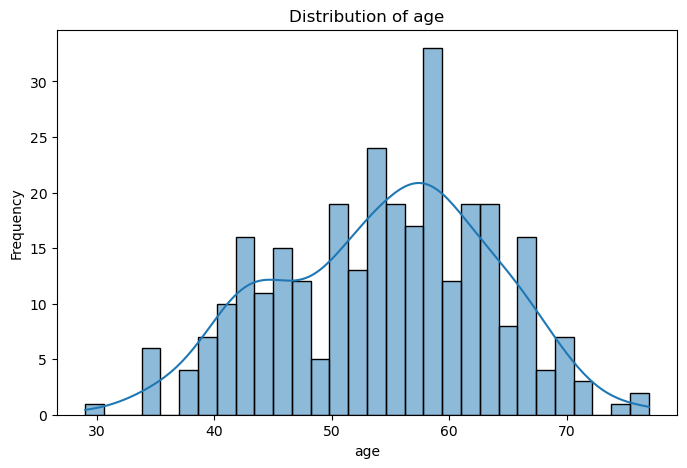

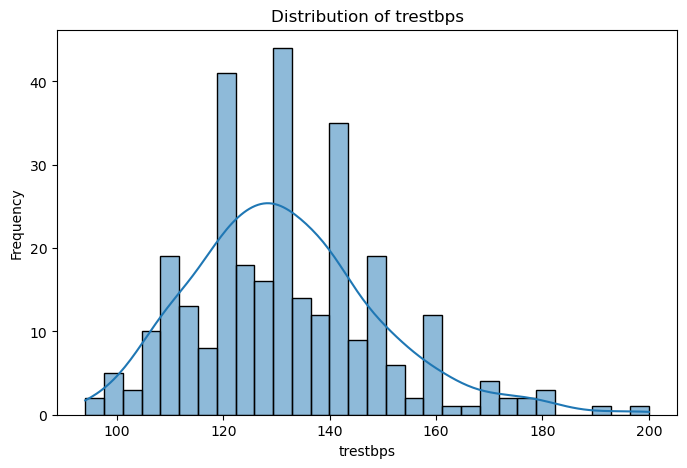

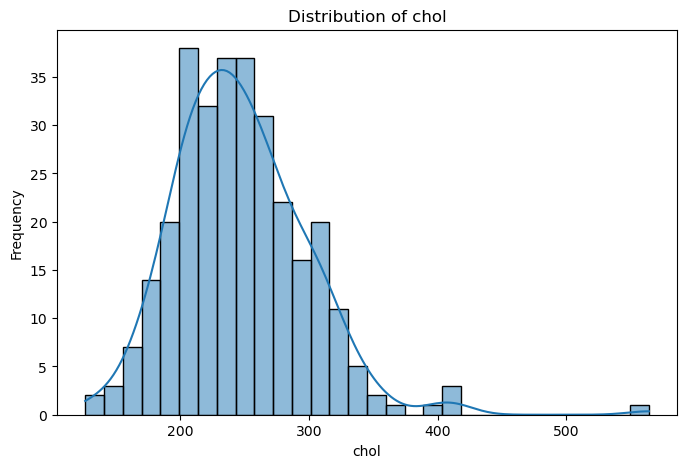

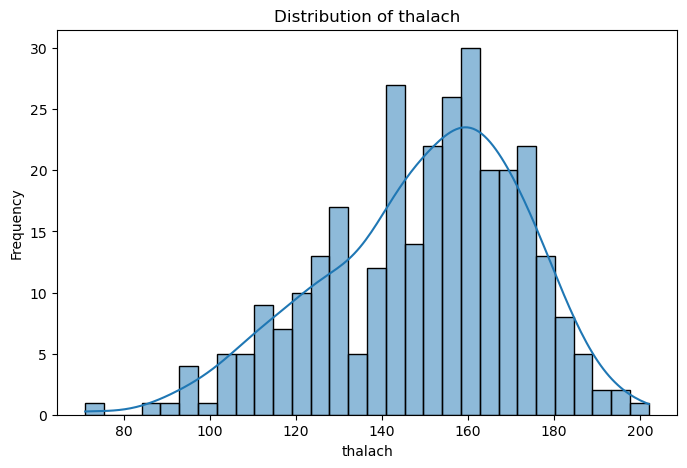

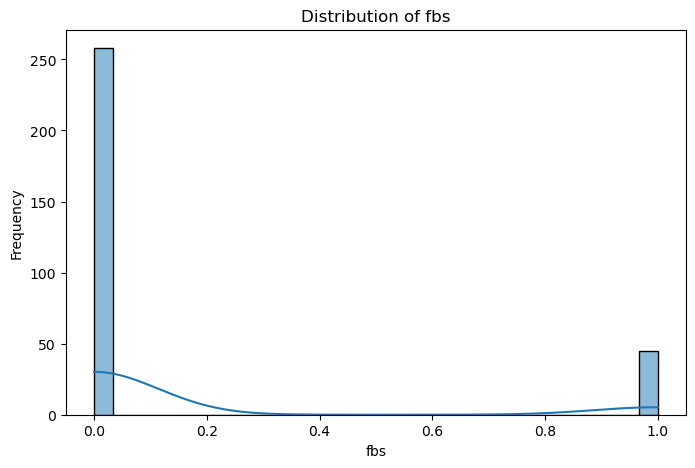

In [107]:
# Distribution of key numeric features
key_features = ['age', 'trestbps', 'chol', 'thalach', 'fbs']
for feature in key_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(heart_data[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

In [11]:
# Statistical measure of data
pd.set_option("display.float", "{:.2f}".format)
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.44,0.68,3.16,131.69,246.69,0.15,0.99,149.61,0.33,1.04,1.60,0.94
std,9.04,0.47,0.96,17.60,51.78,0.36,0.99,22.88,0.47,1.16,0.62,1.23
min,29.00,0.00,1.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,1.00,0.00
25%,48.00,0.00,3.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00
50%,56.00,1.00,3.00,130.00,241.00,0.00,1.00,153.00,0.00,0.80,2.00,0.00
75%,61.00,1.00,4.00,140.00,275.00,0.00,2.00,166.00,1.00,1.60,2.00,2.00
max,77.00,1.00,4.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,3.00,4.00


In [24]:
# Explanation for 'target' column
# Target: Diagnosis of heart disease (angiographic disease status)
# Value 0: < 50% diameter narrowing (Low Risk)
# Value 1: > 50% diameter narrowing (High Risk)
# Values > 1 (2, 3, 4) likely indicate more specific categorizations for different severities or errors in encoding.

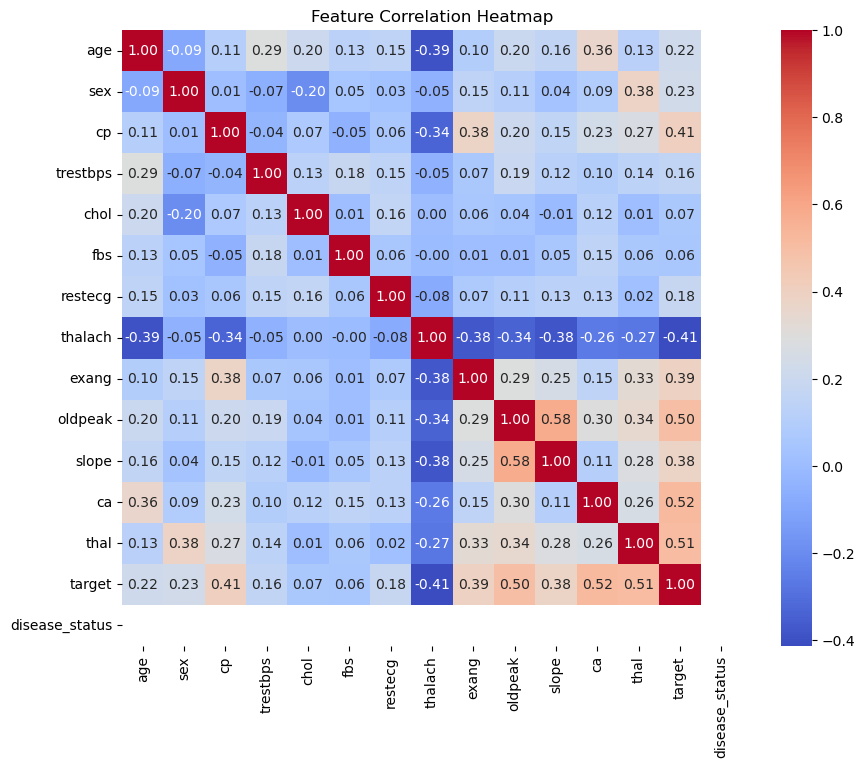

In [54]:
# Convert all columns to numeric where possible
heart_data = heart_data.apply(pd.to_numeric, errors='coerce')

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heart_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [45]:
numeric_data = heart_data.select_dtypes(include=['float64', 'int64'])
correlations = numeric_data.drop('target', axis=1).corrwith(numeric_data['target'])

# Plot correlation using hvplot
correlations.hvplot.barh(
    width=600, height=400,
    title="Correlation between Heart Disease and Numeric Features",
    ylabel='Correlation', xlabel='Numerical Features',
)

:Bars   [index]   (0)

fbs and chol are the lowest correlated with the target variable.
All other variables have a significant correlation with the target variable.

## Data Processing 

After exploring the dataset,

In [ ]:
# Convert all float columns to int
heart_data = heart_data.apply(lambda x: x.astype(int) if x.dtype == 'float' else x)
heart_data['risk'] = heart_data['target'].apply(relabel_risk)
heart_data = heart_data.drop(columns=['target'])  # Drop original 'num' column

# Convert all float columns to int
heart_data = heart_data.apply(lambda x: x.astype(int) if x.dtype == 'float' else x)
#Splitting data into training data & test data
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)
print(X.shape,X_train.shape, X_test.shape)
# Relabel Target Column for Multi-Class Classification
def relabel_risk(target):
    if num == 0:
        return 0  # Low Risk
    elif num == 1:
        return 1  # Medium Risk
    else:
        return 2  # High Risk

# Update 'thal' Column
heart_data['thal'] = heart_data['thal'].replace({3: 0, 6: 1, 7: 2})  # 3 = Normal (0), 6 = Fixed Defect (1), 7 = Reversible Defect (2)

# Rename 'num' to 'target'
heart_data.rename(columns={'num': 'target'}, inplace=True)

# Convert 'ca' column to numeric and then to integer
heart_data['ca'] = pd.to_numeric(heart_data['ca'], errors='coerce')  # Convert to numeric
heart_data.dropna(subset=['ca'], inplace=True)  # Drop rows with NaN in 'ca'
heart_data['ca'] = heart_data['ca'].astype(int)  # Convert to integer


In [ ]:
# Normalize Numerical Features
scaler = MinMaxScaler()
heart_data.iloc[:, :-1] = scaler.fit_transform(heart_data.iloc[:, :-1])

# Split Dataset into Training and Testing Sets
X = heart_data.drop(columns=['target'])
y = heart_data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize Numerical Features
numerical_features = ["age", "trestbps", "chol", "thalach", "oldpeak"]
scaler = MinMaxScaler()
heart_data[numerical_features] = scaler.fit_transform(heart_data[numerical_features])
#splitting the features & target
X=heart_data.drop(columns='target',axis=1)
Y=heart_data['target']
print(X)

## Feature Selection and Importance 

Feature Importances:
      Feature  Importance
7    thalach    0.135485
4       chol    0.126809
0        age    0.116245
9    oldpeak    0.114091
11        ca    0.106275
3   trestbps    0.105638
12      thal    0.075931
2         cp    0.067564
8      exang    0.045160
10     slope    0.034991
1        sex    0.028953
6    restecg    0.025457
5        fbs    0.017401


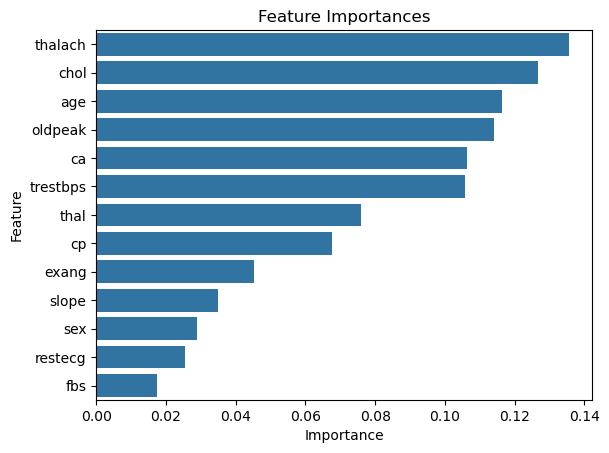

In [51]:
# Feature Importance
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)
print("Feature Importances:\n", feature_importances)

sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title("Feature Importances")
plt.show()

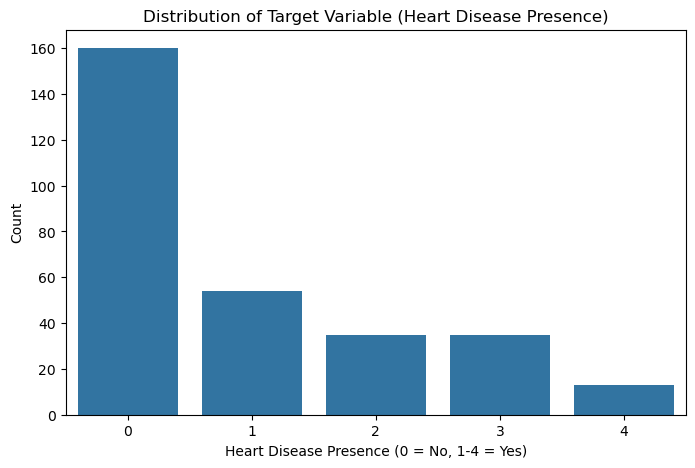

In [66]:

# Distribution of target variable
plt.figure(figsize=(8, 5))
sns.countplot(x='target', data=heart_data)
plt.title('Distribution of Target Variable (Heart Disease Presence)')
plt.xlabel('Heart Disease Presence (0 = No, 1-4 = Yes)')
plt.ylabel('Count')
plt.show()


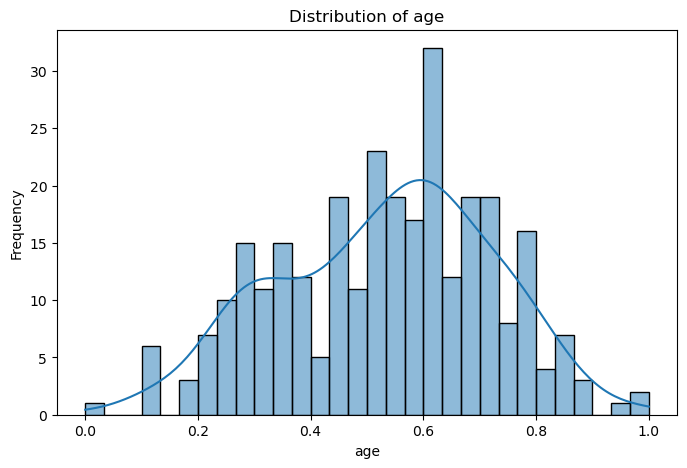

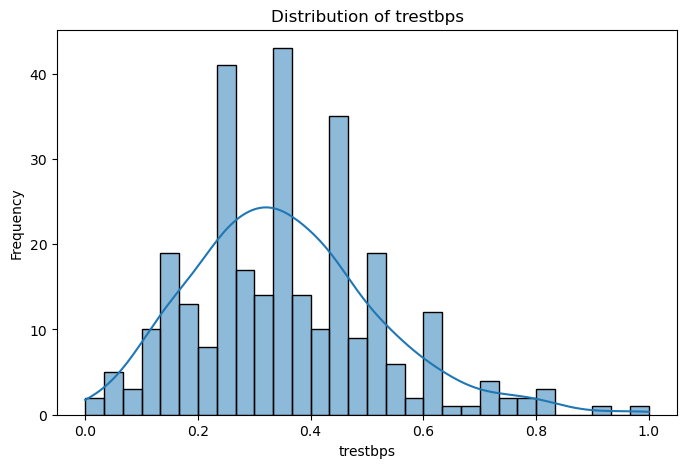

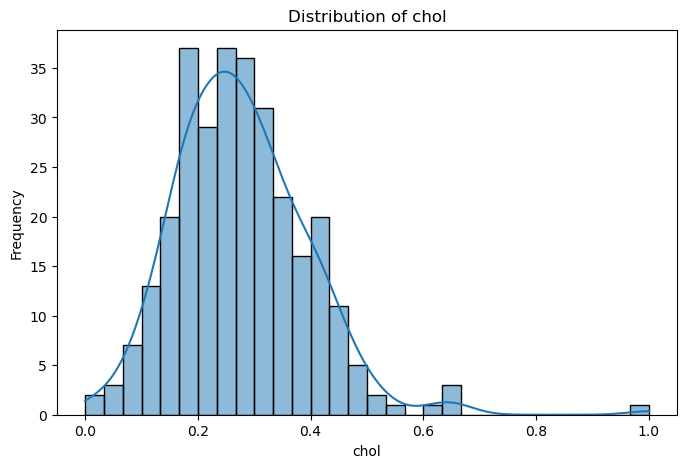

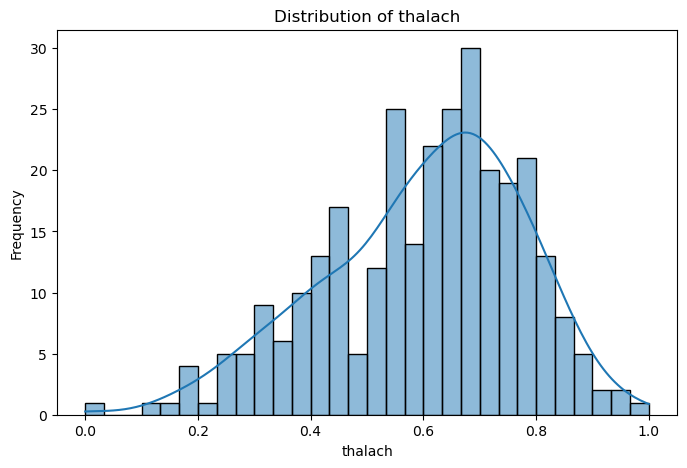

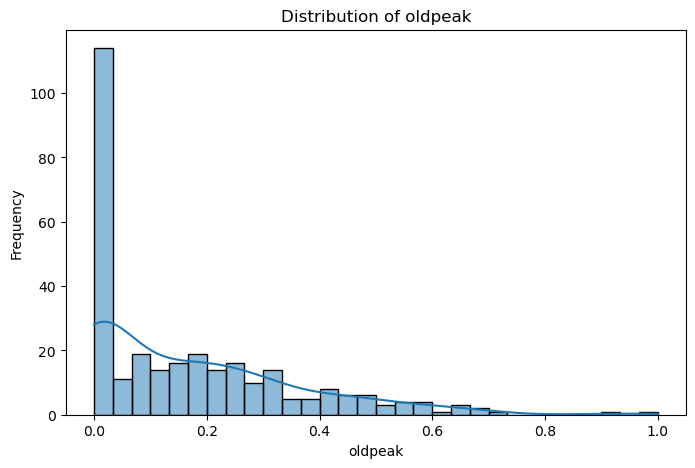